# "Can you predict COVID deaths by food habits?"

In [ ]:
!pip install census
!pip install us


In [ ]:
# Dependencies
import pandas as pd
from sqlalchemy import create_engine
from census import Census

import numpy as np
from matplotlib import pyplot as plt

import requests

# Objective
### We want to analyse the data to see if healthy diet plays a factor in low death rate due to COVID-19

In [ ]:
# File Path
diet_data_file = "datasets_618335_1395643_Protein_Supply_Quantity_Data.csv"

# Read CSV
diet_data = pd.read_csv(diet_data_file)

# Show Data
diet_data

In [ ]:
list(diet_data.columns)

## Use Required Columns

In [4]:
diet_data_subset =diet_data[["Country","Alcoholic Beverages","Animal Products", "Animal fats", "Vegetable Oils","Sugar & Sweeteners",
  "Cereals - Excluding Beer",
  "Vegetal Products",
  "Obesity", "Population"]]

diet_data_subset

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,0.0000,35.9771,40.2477,4.5,38928000.0
1,Albania,0.1840,27.7469,0.0711,0.0084,0.0042,14.2331,22.2552,22.3,2838000.0
2,Algeria,0.0323,13.8360,0.0054,0.0269,0.0000,26.5633,36.1694,26.6,44357000.0
3,Angola,0.6285,15.2311,0.0277,0.0092,0.0092,20.3882,34.7782,6.8,32522000.0
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0430,0.0000,10.5108,16.8161,19.1,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0533,0.0178,21.6526,27.4545,25.2,28645000.0
166,Vietnam,0.1555,20.4466,0.1555,0.0000,0.0056,18.5247,29.5617,2.1,96209000.0
167,Yemen,0.0000,10.0122,0.0188,0.0000,0.0000,35.1179,39.9831,14.1,29826000.0
168,Zambia,0.4824,9.8925,0.0338,0.0000,0.0000,28.5182,40.1117,6.5,18384000.0


In [5]:
diet_data_subset=diet_data_subset.fillna(0)
diet_data_subset

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,0.0000,35.9771,40.2477,4.5,38928000.0
1,Albania,0.1840,27.7469,0.0711,0.0084,0.0042,14.2331,22.2552,22.3,2838000.0
2,Algeria,0.0323,13.8360,0.0054,0.0269,0.0000,26.5633,36.1694,26.6,44357000.0
3,Angola,0.6285,15.2311,0.0277,0.0092,0.0092,20.3882,34.7782,6.8,32522000.0
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0430,0.0000,10.5108,16.8161,19.1,98000.0
...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0533,0.0178,21.6526,27.4545,25.2,28645000.0
166,Vietnam,0.1555,20.4466,0.1555,0.0000,0.0056,18.5247,29.5617,2.1,96209000.0
167,Yemen,0.0000,10.0122,0.0188,0.0000,0.0000,35.1179,39.9831,14.1,29826000.0
168,Zambia,0.4824,9.8925,0.0338,0.0000,0.0000,28.5182,40.1117,6.5,18384000.0


## Analyze the data

In [6]:
diet_data_subset.describe()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,1.700000e+02
mean,0.262809,21.232152,0.108229,0.020805,0.009199,19.024928,28.768171,18.377647,4.452364e+07
std,0.244381,7.921757,0.150429,0.023578,0.042180,6.450422,7.921684,9.862101,1.564182e+08
min,0.000000,4.456100,0.000000,0.000000,0.000000,7.808100,14.215800,0.000000,5.400000e+04
25%,0.066075,14.461225,0.022975,0.005225,0.000000,13.676400,21.699600,8.200000,2.816250e+06
50%,0.198250,21.852950,0.056250,0.015250,0.000000,17.568900,28.152600,20.700000,1.018150e+07
75%,0.381575,28.299000,0.122350,0.028450,0.005050,23.901975,35.541925,25.700000,3.271625e+07
max,1.366000,35.786000,0.980700,0.113500,0.469900,35.977100,45.551500,45.600000,1.402385e+09


## Calculate the STD  Error

In [7]:
diet_data_subset.sem(axis=0)

Alcoholic Beverages         1.874318e-02
Animal Products             6.075710e-01
Animal fats                 1.153735e-02
Vegetable Oils              1.808331e-03
Sugar & Sweeteners          3.235068e-03
Cereals - Excluding Beer    4.947247e-01
Vegetal Products            6.075654e-01
Obesity                     7.563886e-01
Population                  1.199673e+07
dtype: float64

## Load the John Hopkins COVID Confirmed Data 

In [8]:
#Load CSV
confirmed_global="time_series_covid19_confirmed_global.csv"
# Read CSV
confirmed_global_df = pd.read_csv(confirmed_global)

# Show Data
confirmed_global_df


,Province/State,Country/Region,Lat,Long,8/7/2020
0,NaN,Afghanistan,33.939110,67.709953,37015
1,NaN,Albania,41.153300,20.168300,6151
2,NaN,Algeria,28.033900,1.659600,34155
3,NaN,Andorra,42.506300,1.521800,955
4,NaN,Angola,-11.202700,17.873900,1538
...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,878
262,NaN,Yemen,15.552727,48.516388,1796
263,NaN,Comoros,-11.645500,43.333300,396
264,NaN,Tajikistan,38.861000,71.276100,7706


## Drop the columns  not required

In [9]:
confirmed_global_df=confirmed_global_df.drop(['Province/State','Lat','Long'], axis=1)
confirmed_global_df

,Country/Region,8/7/2020
0,Afghanistan,37015
1,Albania,6151
2,Algeria,34155
3,Andorra,955
4,Angola,1538
...,...,...
261,Sao Tome and Principe,878
262,Yemen,1796
263,Comoros,396
264,Tajikistan,7706


# Group by Country

In [10]:
confirmed_global_df=confirmed_global_df.groupby(['Country/Region']).sum().reset_index()
confirmed_global_df

,Country/Region,8/7/2020
0,Afghanistan,37015
1,Albania,6151
2,Algeria,34155
3,Andorra,955
4,Angola,1538
...,...,...
183,West Bank and Gaza,13722
184,Western Sahara,10
185,Yemen,1796
186,Zambia,7486


## Load the John Hopkins COVID Deaths Data 

In [11]:
#Load CSV
deaths_global="time_series_covid19_deaths_global.csv"
# Read CSV
deaths_global_df = pd.read_csv(deaths_global)

# Show Data
deaths_global_df

,Province/State,Country/Region,Lat,Long,8/7/2020
0,NaN,Afghanistan,33.939110,67.709953,1307
1,NaN,Albania,41.153300,20.168300,189
2,NaN,Algeria,28.033900,1.659600,1282
3,NaN,Andorra,42.506300,1.521800,52
4,NaN,Angola,-11.202700,17.873900,67
...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186400,6.613100,15
262,NaN,Yemen,15.552727,48.516388,512
263,NaN,Comoros,-11.645500,43.333300,7
264,NaN,Tajikistan,38.861000,71.276100,62


## Drop columns not required 

In [12]:
deaths_global_df=deaths_global_df.drop(['Province/State','Lat','Long'], axis=1)
deaths_global_df

,Country/Region,8/7/2020
0,Afghanistan,1307
1,Albania,189
2,Algeria,1282
3,Andorra,52
4,Angola,67
...,...,...
261,Sao Tome and Principe,15
262,Yemen,512
263,Comoros,7
264,Tajikistan,62


## Group by Country 

In [13]:
deaths_global_df=deaths_global_df.groupby(['Country/Region']).sum().reset_index()
deaths_global_df

,Country/Region,8/7/2020
0,Afghanistan,1307
1,Albania,189
2,Algeria,1282
3,Andorra,52
4,Angola,67
...,...,...
183,West Bank and Gaza,94
184,Western Sahara,1
185,Yemen,512
186,Zambia,200


## Merge both the John Hopkins Covid-19 DFs 

In [14]:
#Merge both dataframes
#covid_merged_df= confirmed_global_df.merge(deaths_global_df, on='Country/Region')
covid_merged_df=pd.merge(confirmed_global_df, deaths_global_df, on='Country/Region')
covid_merged_df

,Country/Region,8/7/2020_x,8/7/2020_y
0,Afghanistan,37015,1307
1,Albania,6151,189
2,Algeria,34155,1282
3,Andorra,955,52
4,Angola,1538,67
...,...,...,...
183,West Bank and Gaza,13722,94
184,Western Sahara,10,1
185,Yemen,1796,512
186,Zambia,7486,200


## Rename columns appropriately

In [15]:
covid_merged_df=covid_merged_df.rename({'Country/Region':'Country', '8/7/2020_x':'confirmed','8/7/2020_y':'deaths'}, axis=1)

covid_merged_df

,Country,confirmed,deaths
0,Afghanistan,37015,1307
1,Albania,6151,189
2,Algeria,34155,1282
3,Andorra,955,52
4,Angola,1538,67
...,...,...,...
183,West Bank and Gaza,13722,94
184,Western Sahara,10,1
185,Yemen,1796,512
186,Zambia,7486,200


## Merge the diet data with the COVID-19 data

In [16]:
diet_covid_merged=diet_data_subset.merge(covid_merged_df, on='Country')
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,0.0000,35.9771,40.2477,4.5,38928000.0,37015,1307
1,Albania,0.1840,27.7469,0.0711,0.0084,0.0042,14.2331,22.2552,22.3,2838000.0,6151,189
2,Algeria,0.0323,13.8360,0.0054,0.0269,0.0000,26.5633,36.1694,26.6,44357000.0,34155,1282
3,Angola,0.6285,15.2311,0.0277,0.0092,0.0092,20.3882,34.7782,6.8,32522000.0,1538,67
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0430,0.0000,10.5108,16.8161,19.1,98000.0,92,3
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,0.0588,20.0246,0.0374,0.0053,0.0000,23.3709,29.9781,15.3,34174000.0,29057,181
151,Vietnam,0.1555,20.4466,0.1555,0.0000,0.0056,18.5247,29.5617,2.1,96209000.0,789,10
152,Yemen,0.0000,10.0122,0.0188,0.0000,0.0000,35.1179,39.9831,14.1,29826000.0,1796,512
153,Zambia,0.4824,9.8925,0.0338,0.0000,0.0000,28.5182,40.1117,6.5,18384000.0,7486,200


## Analyze

In [17]:
diet_covid_merged.describe()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.00000,155.000000,1.550000e+02,1.550000e+02,155.000000
mean,0.269099,21.265606,0.108377,0.021657,0.008152,19.133215,28.73481,18.503226,4.704352e+07,1.208739e+05,4519.838710
std,0.246077,7.974279,0.155723,0.024101,0.039097,6.532084,7.97434,9.343214,1.634366e+08,4.965328e+05,16904.206733
min,0.000000,4.456100,0.000000,0.000000,0.000000,7.808100,14.21580,0.000000,5.400000e+04,1.700000e+01,0.000000
25%,0.071900,14.398250,0.022450,0.005500,0.000000,13.682600,21.62000,8.650000,3.118500e+06,1.841500e+03,30.000000
50%,0.211600,21.852100,0.053200,0.015600,0.000000,17.571200,28.15360,21.300000,1.050000e+07,7.923000e+03,189.000000
75%,0.389850,28.378450,0.111200,0.028650,0.004900,23.933450,35.60620,25.700000,3.280250e+07,5.869500e+04,1458.000000
max,1.366000,35.786000,0.980700,0.113500,0.469900,35.977100,45.55150,37.300000,1.402385e+09,4.941755e+06,161347.000000


In [18]:
diet_covid_merged.sem()

Alcoholic Beverages         1.976535e-02
Animal Products             6.405095e-01
Animal fats                 1.250796e-02
Vegetable Oils              1.935843e-03
Sugar & Sweeteners          3.140361e-03
Cereals - Excluding Beer    5.246696e-01
Vegetal Products            6.405144e-01
Obesity                     7.504650e-01
Population                  1.312755e+07
confirmed                   3.988247e+04
deaths                      1.357779e+03
dtype: float64

## Calculate the Positive Rate 

In [19]:
diet_covid_merged["Positive Test Rate"] = (100 * \
    diet_covid_merged["confirmed"].astype(
        int) / diet_covid_merged["Population"].astype(int)).round(2)
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,0.0000,35.9771,40.2477,4.5,38928000.0,37015,1307,0.10
1,Albania,0.1840,27.7469,0.0711,0.0084,0.0042,14.2331,22.2552,22.3,2838000.0,6151,189,0.22
2,Algeria,0.0323,13.8360,0.0054,0.0269,0.0000,26.5633,36.1694,26.6,44357000.0,34155,1282,0.08
3,Angola,0.6285,15.2311,0.0277,0.0092,0.0092,20.3882,34.7782,6.8,32522000.0,1538,67,0.00
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0430,0.0000,10.5108,16.8161,19.1,98000.0,92,3,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Uzbekistan,0.0588,20.0246,0.0374,0.0053,0.0000,23.3709,29.9781,15.3,34174000.0,29057,181,0.09
151,Vietnam,0.1555,20.4466,0.1555,0.0000,0.0056,18.5247,29.5617,2.1,96209000.0,789,10,0.00
152,Yemen,0.0000,10.0122,0.0188,0.0000,0.0000,35.1179,39.9831,14.1,29826000.0,1796,512,0.01
153,Zambia,0.4824,9.8925,0.0338,0.0000,0.0000,28.5182,40.1117,6.5,18384000.0,7486,200,0.04


## Calculate the Death Rate

In [20]:
diet_covid_merged["Death Rate"] = (100 * \
    diet_covid_merged["deaths"].astype(
        int) / diet_covid_merged["confirmed"].astype(int)).round(2)
diet_covid_merged.head(20)

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,0.0000,35.9771,40.2477,4.5,38928000.0,37015,1307,0.10,3.53
1,Albania,0.1840,27.7469,0.0711,0.0084,0.0042,14.2331,22.2552,22.3,2838000.0,6151,189,0.22,3.07
2,Algeria,0.0323,13.8360,0.0054,0.0269,0.0000,26.5633,36.1694,26.6,44357000.0,34155,1282,0.08,3.75
3,Angola,0.6285,15.2311,0.0277,0.0092,0.0092,20.3882,34.7782,6.8,32522000.0,1538,67,0.00,4.36
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0430,0.0000,10.5108,16.8161,19.1,98000.0,92,3,0.09,3.26
5,Argentina,0.1704,31.9799,0.0097,0.0000,0.0049,13.6702,18.0176,28.5,45377000.0,235677,4411,0.52,1.87
6,Armenia,0.0411,22.8846,0.1438,0.0205,0.0051,18.2738,27.1154,20.9,2956000.0,39985,777,1.35,1.94
7,Australia,0.2914,32.9787,0.0740,0.0463,0.0000,10.9343,17.0213,30.4,25754000.0,20698,278,0.08,1.34
8,Austria,0.6150,30.0009,0.3376,0.0647,0.0139,13.1508,19.9991,21.9,8914000.0,21837,720,0.24,3.30
9,Azerbaijan,0.3465,16.3039,0.0596,0.0217,0.0000,28.2218,33.7015,19.9,10108000.0,33376,483,0.33,1.45


## Sort by Death Rate, let us see the top 20

In [21]:
diet_covid_merged=diet_covid_merged.sort_values(['Death Rate'], ascending=False).reset_index(drop=True)

highest_deaths_rate_data=diet_covid_merged.head(20)
highest_deaths_rate_data


,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0000,10.0122,0.0188,0.0000,0.0000,35.1179,39.9831,14.1,2.982600e+07,1796,512,0.01,28.51
1,United Kingdom,0.4758,28.1080,0.0673,0.0000,0.0048,13.8546,21.8944,29.5,6.716000e+07,310696,46596,0.46,15.00
2,Italy,0.1827,26.7179,0.1405,0.0141,0.0000,16.4832,23.2845,22.9,6.029600e+07,249756,35190,0.41,14.09
3,Belgium,0.5466,28.4976,0.4678,0.1133,0.0049,13.7687,21.5098,24.5,1.151500e+07,72784,9866,0.63,13.56
4,Hungary,0.5289,28.3269,0.5687,0.1081,0.0000,15.6506,21.6731,28.6,9.767000e+06,4621,602,0.05,13.03
5,France,0.1784,31.0849,0.2677,0.0134,0.0045,13.4993,18.9195,23.2,6.494000e+07,235207,30327,0.36,12.89
6,Mexico,0.2784,23.4422,0.0107,0.0214,0.0428,19.3737,26.5578,28.4,1.277920e+08,469407,51311,0.37,10.93
7,Netherlands,0.3823,32.7073,0.0573,0.0430,0.0048,10.9008,17.2903,23.1,1.746700e+07,58117,6174,0.33,10.62
8,Spain,0.4855,31.0583,0.0607,0.0140,0.0047,11.2506,18.9394,27.1,4.763500e+07,314362,28503,0.66,9.07
9,Chad,0.0567,15.4353,0.0425,0.0000,0.0000,22.6744,34.5576,4.8,1.687700e+07,942,76,0.01,8.07


## Lowest Death rate 

In [22]:

lowest_deaths_rate_data=diet_covid_merged.tail(20)
lowest_deaths_rate_data

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
135,Oman,0.0294,24.7856,0.0294,0.0059,0.0000,16.4454,25.2203,22.9,4713000.0,81067,502,1.72,0.62
136,Uzbekistan,0.0588,20.0246,0.0374,0.0053,0.0000,23.3709,29.9781,15.3,34174000.0,29057,181,0.09,0.62
137,United Arab Emirates,0.0000,20.4155,0.0606,0.0047,0.0000,16.2513,29.5822,29.9,9778000.0,62061,356,0.63,0.57
138,Namibia,0.3860,18.3127,0.0483,0.0241,0.0000,19.5191,31.6873,15.0,2541000.0,2802,16,0.11,0.57
139,Iceland,0.3794,35.7860,0.3298,0.0035,0.0035,9.3826,14.2158,23.1,368000.0,1952,10,0.53,0.51
140,Ghana,0.1509,12.1922,0.0079,0.0159,0.0000,16.2272,37.8157,9.7,31073000.0,40097,206,0.13,0.51
141,Uganda,0.7449,10.3906,0.0382,0.0000,0.0000,13.7809,39.6046,4.1,45741000.0,1254,6,0.00,0.48
142,Maldives,0.0367,30.0398,0.0612,0.0061,0.0061,13.4537,19.9633,7.9,541000.0,4769,19,0.88,0.40
143,Sri Lanka,0.0699,14.5498,0.0000,0.0000,0.0000,23.7396,35.4541,5.4,21937000.0,2839,11,0.01,0.39
144,Nepal,0.0407,8.5877,0.0271,0.0068,0.0068,28.0559,41.4055,3.8,29996000.0,22214,70,0.07,0.32


## Comparing some countries, looking for outliers

In [23]:
diet_covid_merged[diet_covid_merged['Country']== 'Yemen']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0,10.0122,0.0188,0.0,0.0,35.1179,39.9831,14.1,29826000.0,1796,512,0.01,28.51


In [24]:
diet_covid_merged[diet_covid_merged['Country']== 'Nepal']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
144,Nepal,0.0407,8.5877,0.0271,0.0068,0.0068,28.0559,41.4055,3.8,29996000.0,22214,70,0.07,0.32


In [25]:
diet_covid_merged[diet_covid_merged['Country']== 'Japan']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
74,Japan,0.2541,27.7588,0.0058,0.0289,0.0462,12.4213,22.2383,4.4,125967000.0,45764,1042,0.04,2.28


In [26]:
diet_covid_merged[diet_covid_merged['Country']== 'US']

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
51,US,0.2946,32.4775,0.0264,0.0835,0.0747,10.4594,17.5247,37.3,329878000.0,4941755,161347,1.5,3.26


## Differences in Death Rate can be caused by:

#### Differences in the number of people tested: With more testing, more people with milder cases are identified. This lowers the Death Rate.
#### Demographics: For example, Mortality tends to be higher in older populations.
#### Characteristics of the healthcare system: For example, Mortality may rise as hospitals become overwhelmed and have fewer resources.
#### Other factors, many of which remain unknown.

In [27]:
used_column_names = [
    'Alcoholic Beverages',
    'Animal Products',
    'Animal fats',
    'Vegetable Oils',
    'Sugar & Sweeteners',
    'Cereals - Excluding Beer',
    'Vegetal Products',
    'Obesity',
    'Population'
]

## Computing the average for countries with Hightest/Lowest Death Rates

In [28]:
highest_deaths_rate_mean = {column_name:highest_deaths_rate_data[column_name].mean() for column_name in used_column_names[:-1]}
print('Average values for records with highest death rate: \n{}'.format(highest_deaths_rate_mean))

lowest_deaths_rate_mean = {column_name:lowest_deaths_rate_data[column_name].mean() for column_name in used_column_names[:-1]}
print('Average values for records with lowest death rate: \n{}'.format(lowest_deaths_rate_mean))

Average values for records with highest death rate: 
{'Alcoholic Beverages': 0.29008999999999996, 'Animal Products': 24.378810000000005, 'Animal fats': 0.20856, 'Vegetable Oils': 0.03185999999999999, 'Sugar & Sweeteners': 0.005509999999999999, 'Cereals - Excluding Beer': 17.447875, 'Vegetal Products': 25.62022, 'Obesity': 19.84}
Average values for records with lowest death rate: 
{'Alcoholic Beverages': 0.22775499999999999, 'Animal Products': 21.59731, 'Animal fats': 0.06732500000000001, 'Vegetable Oils': 0.014415, 'Sugar & Sweeteners': 0.0008200000000000001, 'Cereals - Excluding Beer': 16.921215, 'Vegetal Products': 28.40404000000001, 'Obesity': 14.955000000000002}


In [29]:
diet_covid_merged.to_csv('output.csv', index = False, header = True)

# ML approach

In [30]:
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
0,Yemen,0.0000,10.0122,0.0188,0.0000,0.0000,35.1179,39.9831,14.1,29826000.0,1796,512,0.01,28.51
1,United Kingdom,0.4758,28.1080,0.0673,0.0000,0.0048,13.8546,21.8944,29.5,67160000.0,310696,46596,0.46,15.00
2,Italy,0.1827,26.7179,0.1405,0.0141,0.0000,16.4832,23.2845,22.9,60296000.0,249756,35190,0.41,14.09
3,Belgium,0.5466,28.4976,0.4678,0.1133,0.0049,13.7687,21.5098,24.5,11515000.0,72784,9866,0.63,13.56
4,Hungary,0.5289,28.3269,0.5687,0.1081,0.0000,15.6506,21.6731,28.6,9767000.0,4621,602,0.05,13.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Timor-Leste,0.0433,13.5655,0.1040,0.0087,0.0000,26.8711,36.4432,2.9,1318000.0,25,0,0.00,0.00
151,Grenada,0.1204,30.3273,0.0567,0.0283,0.0000,12.2414,19.6727,20.2,113000.0,24,0,0.02,0.00
152,Cambodia,0.4817,14.6494,0.0153,0.0000,0.0000,25.8430,35.3544,3.5,15497000.0,246,0,0.00,0.00
153,Saint Kitts and Nevis,0.3183,32.0169,0.1104,0.0585,0.0000,10.9516,17.9799,23.1,54000.0,17,0,0.03,0.00


### Check the corelational matrix

In [31]:
#Removing Yemen from the DF, could be an outlier
diet_covid_merged=diet_covid_merged.drop(diet_covid_merged.index[[0]])
diet_covid_merged

,Country,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
1,United Kingdom,0.4758,28.1080,0.0673,0.0000,0.0048,13.8546,21.8944,29.5,67160000.0,310696,46596,0.46,15.00
2,Italy,0.1827,26.7179,0.1405,0.0141,0.0000,16.4832,23.2845,22.9,60296000.0,249756,35190,0.41,14.09
3,Belgium,0.5466,28.4976,0.4678,0.1133,0.0049,13.7687,21.5098,24.5,11515000.0,72784,9866,0.63,13.56
4,Hungary,0.5289,28.3269,0.5687,0.1081,0.0000,15.6506,21.6731,28.6,9767000.0,4621,602,0.05,13.03
5,France,0.1784,31.0849,0.2677,0.0134,0.0045,13.4993,18.9195,23.2,64940000.0,235207,30327,0.36,12.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Timor-Leste,0.0433,13.5655,0.1040,0.0087,0.0000,26.8711,36.4432,2.9,1318000.0,25,0,0.00,0.00
151,Grenada,0.1204,30.3273,0.0567,0.0283,0.0000,12.2414,19.6727,20.2,113000.0,24,0,0.02,0.00
152,Cambodia,0.4817,14.6494,0.0153,0.0000,0.0000,25.8430,35.3544,3.5,15497000.0,246,0,0.00,0.00
153,Saint Kitts and Nevis,0.3183,32.0169,0.1104,0.0585,0.0000,10.9516,17.9799,23.1,54000.0,17,0,0.03,0.00


In [32]:
diet_covid_merged.corr()

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity,Population,confirmed,deaths,Positive Test Rate,Death Rate
Alcoholic Beverages,1.000000,0.240038,0.416655,0.188505,0.044327,-0.326681,-0.240013,0.063942,-0.103230,-0.026358,0.006936,-0.022262,0.135140
Animal Products,0.240038,1.000000,0.452124,0.449475,0.096516,-0.838024,-1.000000,0.606750,-0.027595,0.125461,0.180405,0.320800,0.187713
Animal fats,0.416655,0.452124,1.000000,0.529517,-0.012804,-0.376339,-0.452100,0.293466,-0.084431,-0.054095,-0.027691,0.018228,0.261304
Vegetable Oils,0.188505,0.449475,0.529517,1.000000,0.073845,-0.366033,-0.449435,0.405424,-0.062795,0.146785,0.150868,0.084167,0.256153
Sugar & Sweeteners,0.044327,0.096516,-0.012804,0.073845,1.000000,-0.102064,-0.096443,0.017189,0.110889,0.199772,0.190722,0.122082,0.030811
Cereals - Excluding Beer,-0.326681,-0.838024,-0.376339,-0.366033,-0.102064,1.000000,0.838025,-0.443450,0.013072,-0.108631,-0.155679,-0.243969,-0.109299
Vegetal Products,-0.240013,-1.000000,-0.452100,-0.449435,-0.096443,0.838025,1.000000,-0.606700,0.027592,-0.125440,-0.180375,-0.320769,-0.187709
Obesity,0.063942,0.606750,0.293466,0.405424,0.017189,-0.443450,-0.606700,1.000000,-0.184771,0.157495,0.208704,0.384322,0.184277
Population,-0.103230,-0.027595,-0.084431,-0.062795,0.110889,0.013072,0.027592,-0.184771,1.000000,0.402880,0.316227,-0.019182,0.067597
confirmed,-0.026358,0.125461,-0.054095,0.146785,0.199772,-0.108631,-0.125440,0.157495,0.402880,1.000000,0.937312,0.400247,0.068884


### Looking at the above corelational matrix, we can see that Animal Products, Vegetable Oils, Sugars & sweeteners and Obesity corelate more with deaths. 

In [33]:
!pip install sklearn --upgrade


Requirement already up-to-date: sklearn in c:\users\aguha\anaconda3\lib\site-packages (0.0)


In [34]:
# Set features. This will also be used as your x values.
X = diet_covid_merged.drop(['deaths', 'Country', 'Population','Death Rate', 'confirmed','Positive Test Rate'], axis=1)

In [35]:
# Use Deaths for the y values
y=diet_covid_merged["Death Rate"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
X

,Alcoholic Beverages,Animal Products,Animal fats,Vegetable Oils,Sugar & Sweeteners,Cereals - Excluding Beer,Vegetal Products,Obesity
1,0.4758,28.1080,0.0673,0.0000,0.0048,13.8546,21.8944,29.5
2,0.1827,26.7179,0.1405,0.0141,0.0000,16.4832,23.2845,22.9
3,0.5466,28.4976,0.4678,0.1133,0.0049,13.7687,21.5098,24.5
4,0.5289,28.3269,0.5687,0.1081,0.0000,15.6506,21.6731,28.6
5,0.1784,31.0849,0.2677,0.0134,0.0045,13.4993,18.9195,23.2
...,...,...,...,...,...,...,...,...
150,0.0433,13.5655,0.1040,0.0087,0.0000,26.8711,36.4432,2.9
151,0.1204,30.3273,0.0567,0.0283,0.0000,12.2414,19.6727,20.2
152,0.4817,14.6494,0.0153,0.0000,0.0000,25.8430,35.3544,3.5
153,0.3183,32.0169,0.1104,0.0585,0.0000,10.9516,17.9799,23.1


In [38]:
y

1      15.00
2      14.09
3      13.56
4      13.03
5      12.89
       ...  
150     0.00
151     0.00
152     0.00
153     0.00
154     0.00
Name: Death Rate, Length: 154, dtype: float64

## Random Forrest

In [39]:
from sklearn.ensemble import RandomForestRegressor

#Model
reg = RandomForestRegressor()

#Fit
reg.fit(X, y)


C:\Users\aguha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [40]:
#Score
reg.score(X, y)

0.7937803085395012

In [41]:
 [x for x in zip(reg.feature_importances_, X.columns)]

[(0.12040162219982475, 'Alcoholic Beverages'),
 (0.09224323035958104, 'Animal Products'),
 (0.16628687167206027, 'Animal fats'),
 (0.19645399573892575, 'Vegetable Oils'),
 (0.14608048840083013, 'Sugar & Sweeteners'),
 (0.10396094559842836, 'Cereals - Excluding Beer'),
 (0.0542022835464709, 'Vegetal Products'),
 (0.12037056248387881, 'Obesity')]

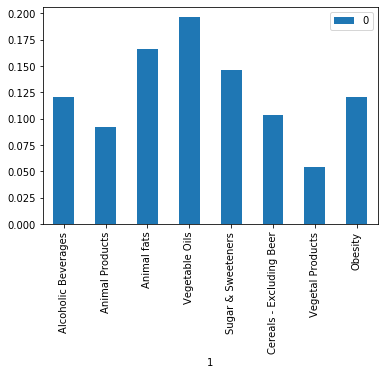

In [42]:
pd.DataFrame([x for x in zip(reg.feature_importances_, X.columns)]).plot(kind='bar', y=0, x=1)

### Looking at the feature importances, we can see that Vegetable Oils, Animal fats followed by Sugars have a high importance in predicting Deaths 

In [55]:
my_df = pd.DataFrame({
    'Alcoholic Beverages':[12.5],
    'Animal Products':[2.5],
    'Animal fats':[32.5],
    'Vegetable Oils':[32.5],
    'Sugar & Sweeteners':[12.5],
    'Cereals - Excluding Beer':[2.5],
    'Vegetal Products':[2.5],
    'Obesity':[32.5]
})

In [56]:
reg.predict(my_df)

array([7.112])